#Applied Competitive Lab in Data Science
##Exercise 1

> Indented block



##Questions

###Read data

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("ex1.csv")

In [32]:
df.head(2)

Unnamed: 0  incident_id        date state city_or_county  \
0           0       137007  2016-07-23  Utah         Draper   
1           1        49807  2014-12-13    -1        Chicago   

                             address  n_killed  n_injured  \
0                        12300 South         0          1   
1  10400 block of South State Street        -1          0   

   congressional_district  gun_stolen  ...  \
0                     4.0         NaN  ...   
1                     2.0  0::Unknown  ...   

                                               notes participant_age  \
0  Man wanted for prior agg asault shot self in h...           0::30   
1                                Man shot, drive-by;           0::26   

  participant_age_group participant_gender      participant_name  \
0          0::Adult 18+            0::Male       0::Eddie Heuser   
1          0::Adult 18+            0::Male  0::Tyrece L. Stornes   

   participant_relationship participant_status    participant_type  \
0                       NaN         0::Injured  0::Subject-Suspect   
1                       NaN          0::Killed           0::Victim   

  state_house_district state_senate_district  
0                 51.0                  11.0  
1                 28.0                  14.0  

[2 rows x 26 columns]

###1.(a)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23967 non-null  int64  
 1   incident_id               23967 non-null  int64  
 2   date                      23967 non-null  object 
 3   state                     23967 non-null  object 
 4   city_or_county            23967 non-null  object 
 5   address                   22327 non-null  object 
 6   n_killed                  23967 non-null  int64  
 7   n_injured                 23967 non-null  int64  
 8   congressional_district    22780 non-null  float64
 9   gun_stolen                14015 non-null  object 
 10  gun_type                  14017 non-null  object 
 11  incident_characteristics  23938 non-null  object 
 12  latitude                  23338 non-null  object 
 13  location_description      4150 non-null   object 
 14  longit

In [34]:
cols = df.columns
num_cols = df._get_numeric_data().columns
lst_categorial = list(set(cols) - set(num_cols))

In [35]:
lst_categorial

['address',
 'participant_relationship',
 'gun_stolen',
 'participant_name',
 'participant_age_group',
 'participant_status',
 'participant_gender',
 'state',
 'latitude',
 'participant_type',
 'gun_type',
 'notes',
 'incident_characteristics',
 'date',
 'location_description',
 'city_or_county',
 'participant_age']

**Categorical features :** incident_id, date, state, city_or_count, 
n_killed, n_injured, congressional_district, gun_stolen, gun_type, n_guns_involved, participant_age, participant_age_group, participant_gender, participant_name, participant_relationship, participant_status, participant_type, state_house_district, state_senate_district.

**Free test :** notes, address,  location_description, incident_characteristics.

**Ordinal features:** date, n_injured, n_killed, n_guns_involved,  participant_age_group, participant_age( we can look age as continues as well).

**Continuous features:** latitude, longitude.

After proccess we can convert the free text to be categorial.

###1.(b)

1. state
2. participant_status
3. location_description
4. gun_type

###State

In [36]:
df['state'].value_counts()

-1              7999
Illinois        1089
California       995
Florida          893
Texas            850
                ... 
south dakota       2
hawaii             2
maine              1
north dakota       1
vermont            1
Name: state, Length: 103, dtype: int64

Text(0.5, 1.0, 'Count of States in dataframe')

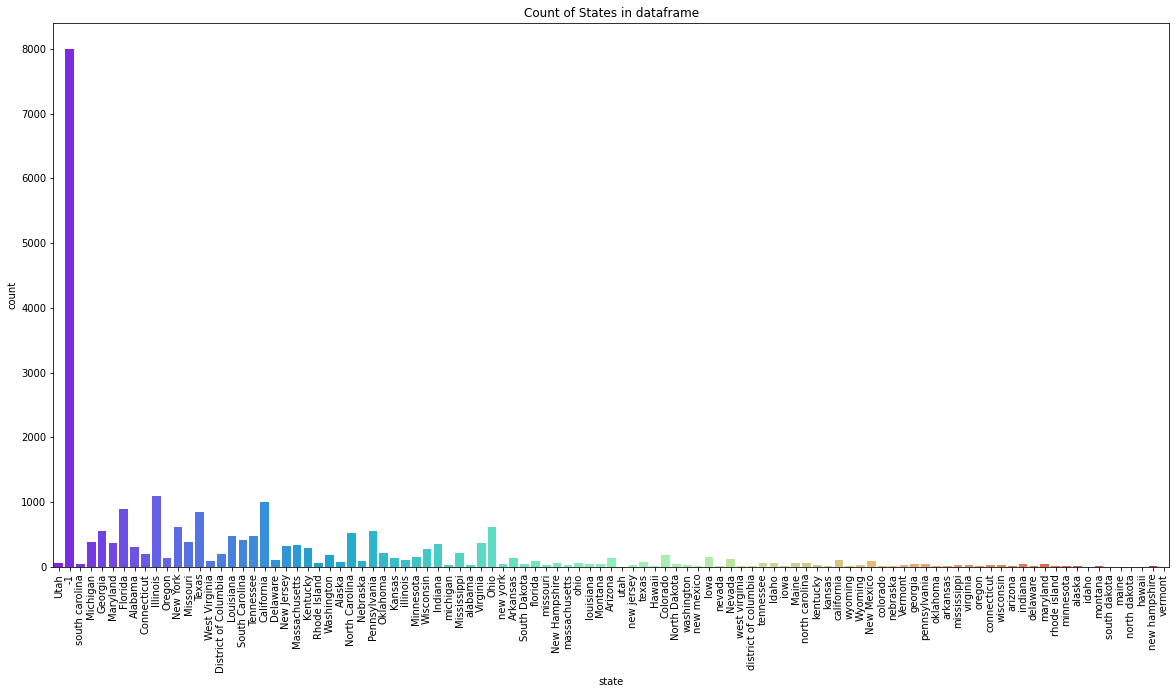

In [37]:
plt.figure(figsize=(20,10))
g = sns.countplot(x='state',data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of States in dataframe")

We can notice that the distribution is not uniformly distributed, we also can notice we have ~8000 rows with -1 which looks as mistake.

###Location description

In [149]:
df['location_description'].value_counts()

Austin                        19843
Walmart                          22
Motel 6                          21
McDonald's                       17
Shell                            14
                              ...  
San Antonio Public Library        1
Northwoods Trading Post           1
Thorntons                         1
Pawtucketville                    1
Big Woods Goods                   1
Name: location_description, Length: 3455, dtype: int64

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

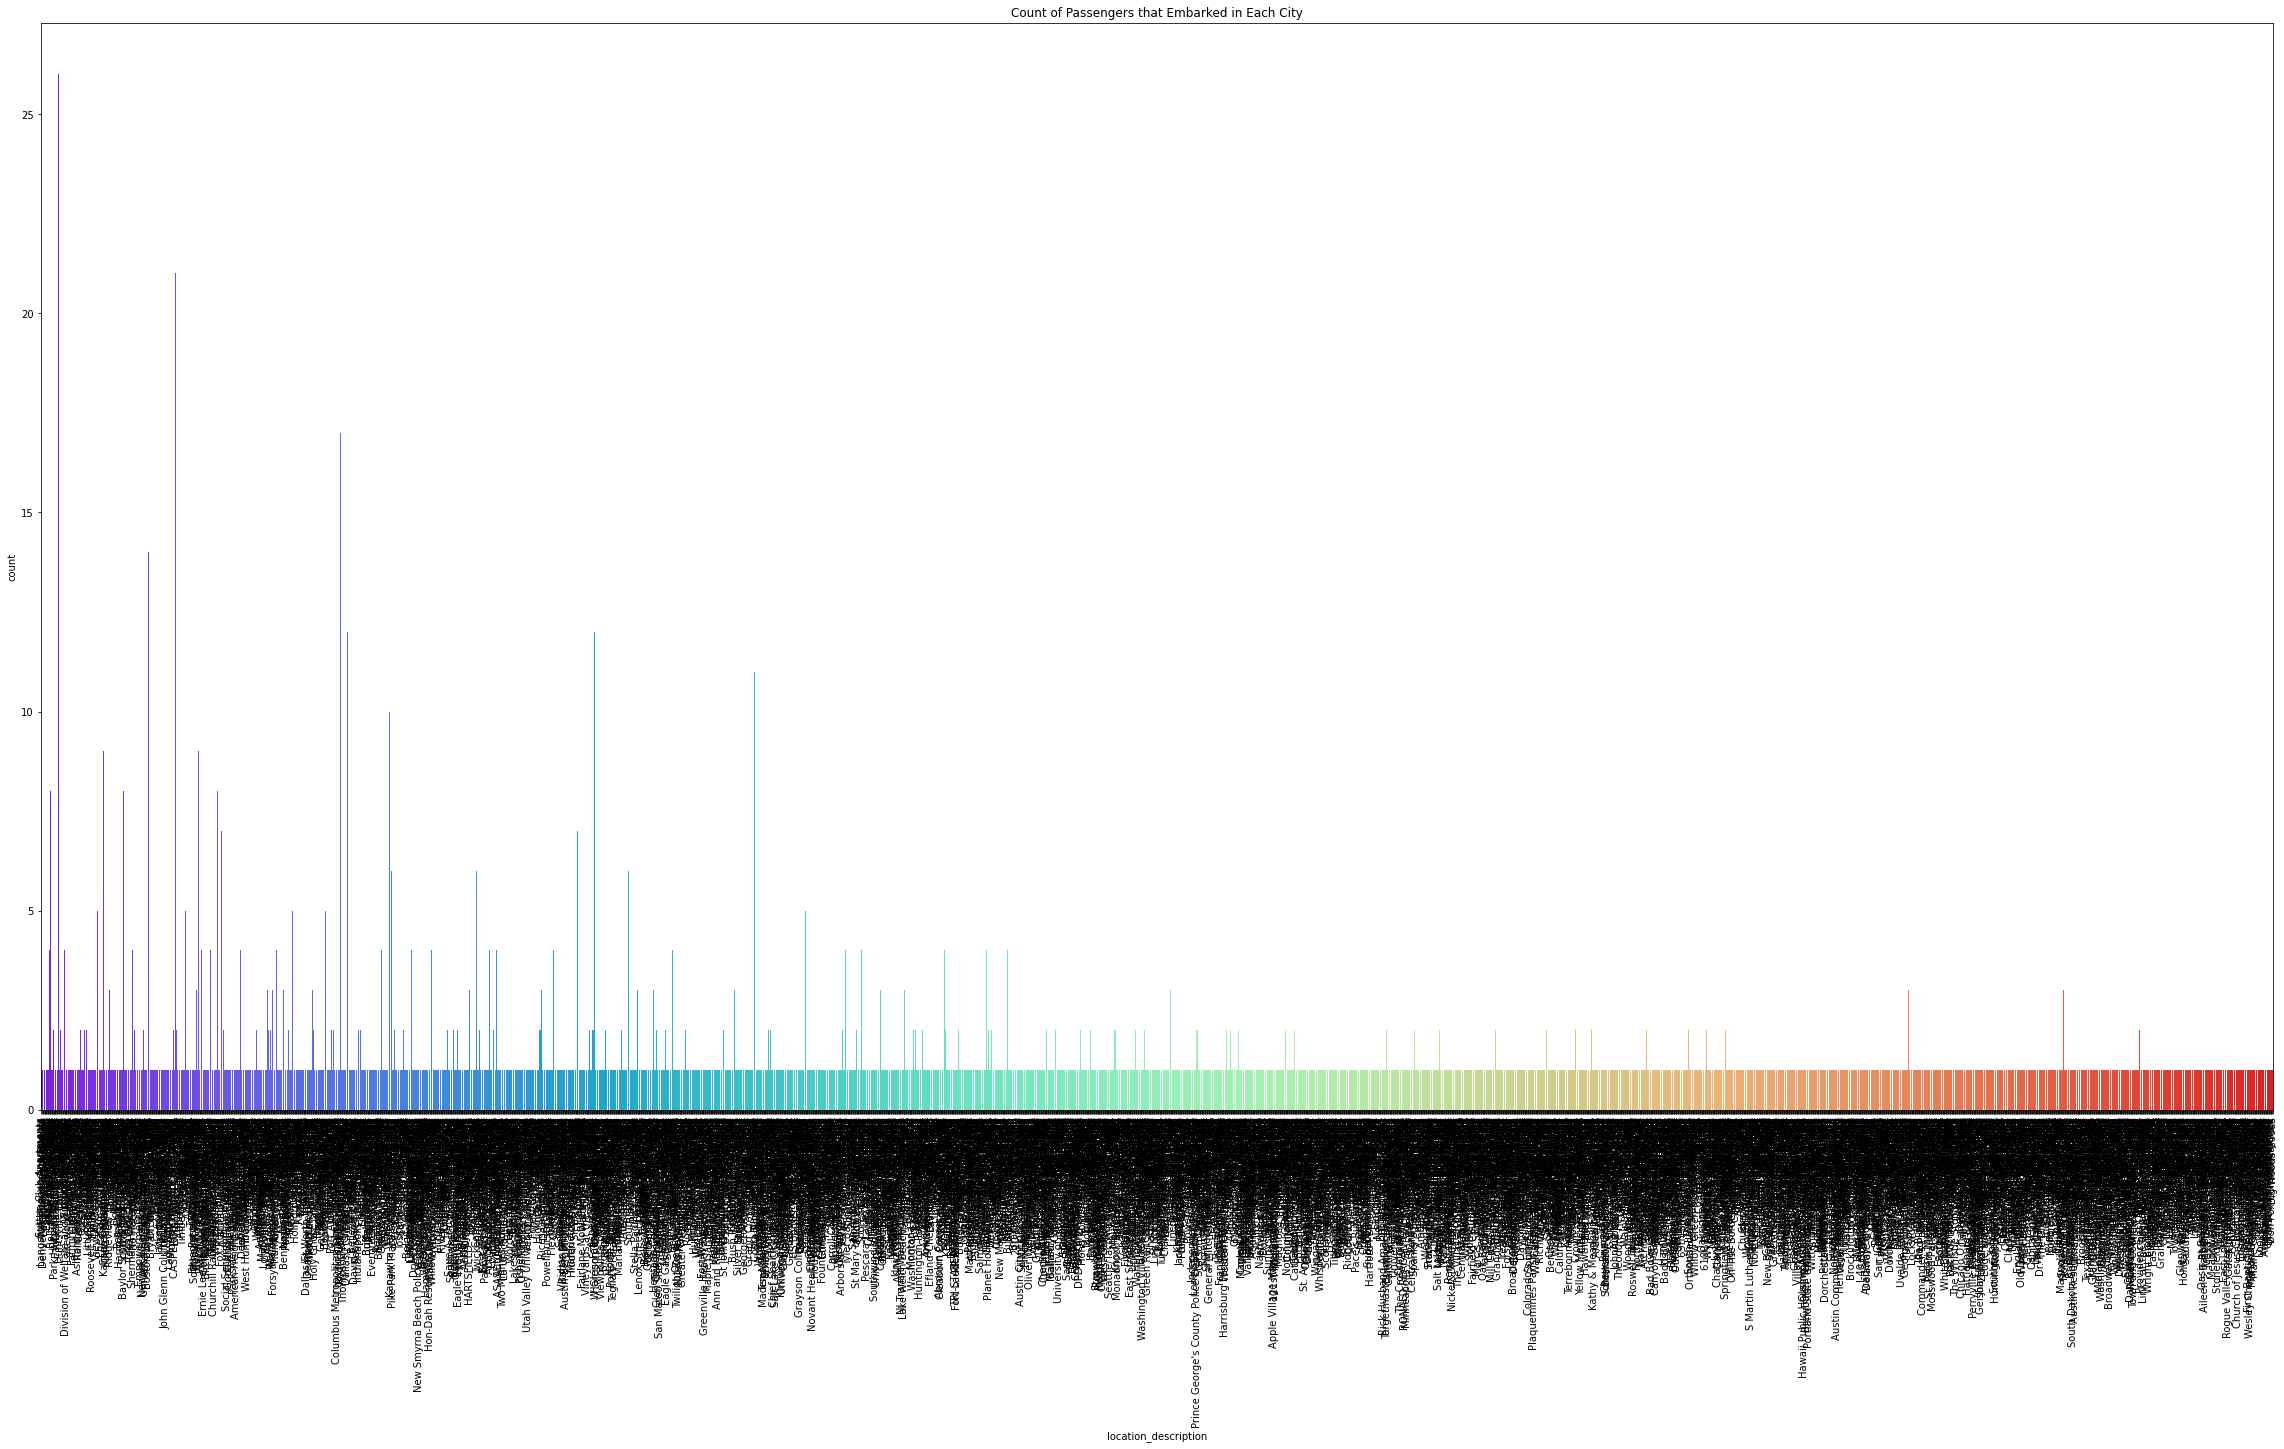

In [39]:
plt.figure(figsize=(40,20))
g = sns.countplot(x='location_description',data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of Passengers that Embarked in Each City")

We can notive that the majority have the value one.
Also theres lots of values that apears more then once. so the feature  is almost uniformly distributed

###Participant status

In [40]:
df['participant_status'].value_counts()

0::Injured                                                                                           4242
0::Unharmed, Arrested                                                                                2598
0::Killed                                                                                            2096
0::Injured||1::Unharmed                                                                              1281
0::Unharmed                                                                                          1070
                                                                                                     ... 
0::Injured||1::Unharmed||2::Unharmed||3::Unharmed||4::Injured||5::Unharmed||6::Unharmed                 1
0::Killed||1::Injured||2::Injured||3::Injured||4::Unharmed||5::Unharmed||6::Unharmed||7::Unharmed       1
0:Killed|1:Unharmed|2:Unharmed                                                                          1
0::Killed||1::Unharmed, Arrested||2::Unharmed,

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

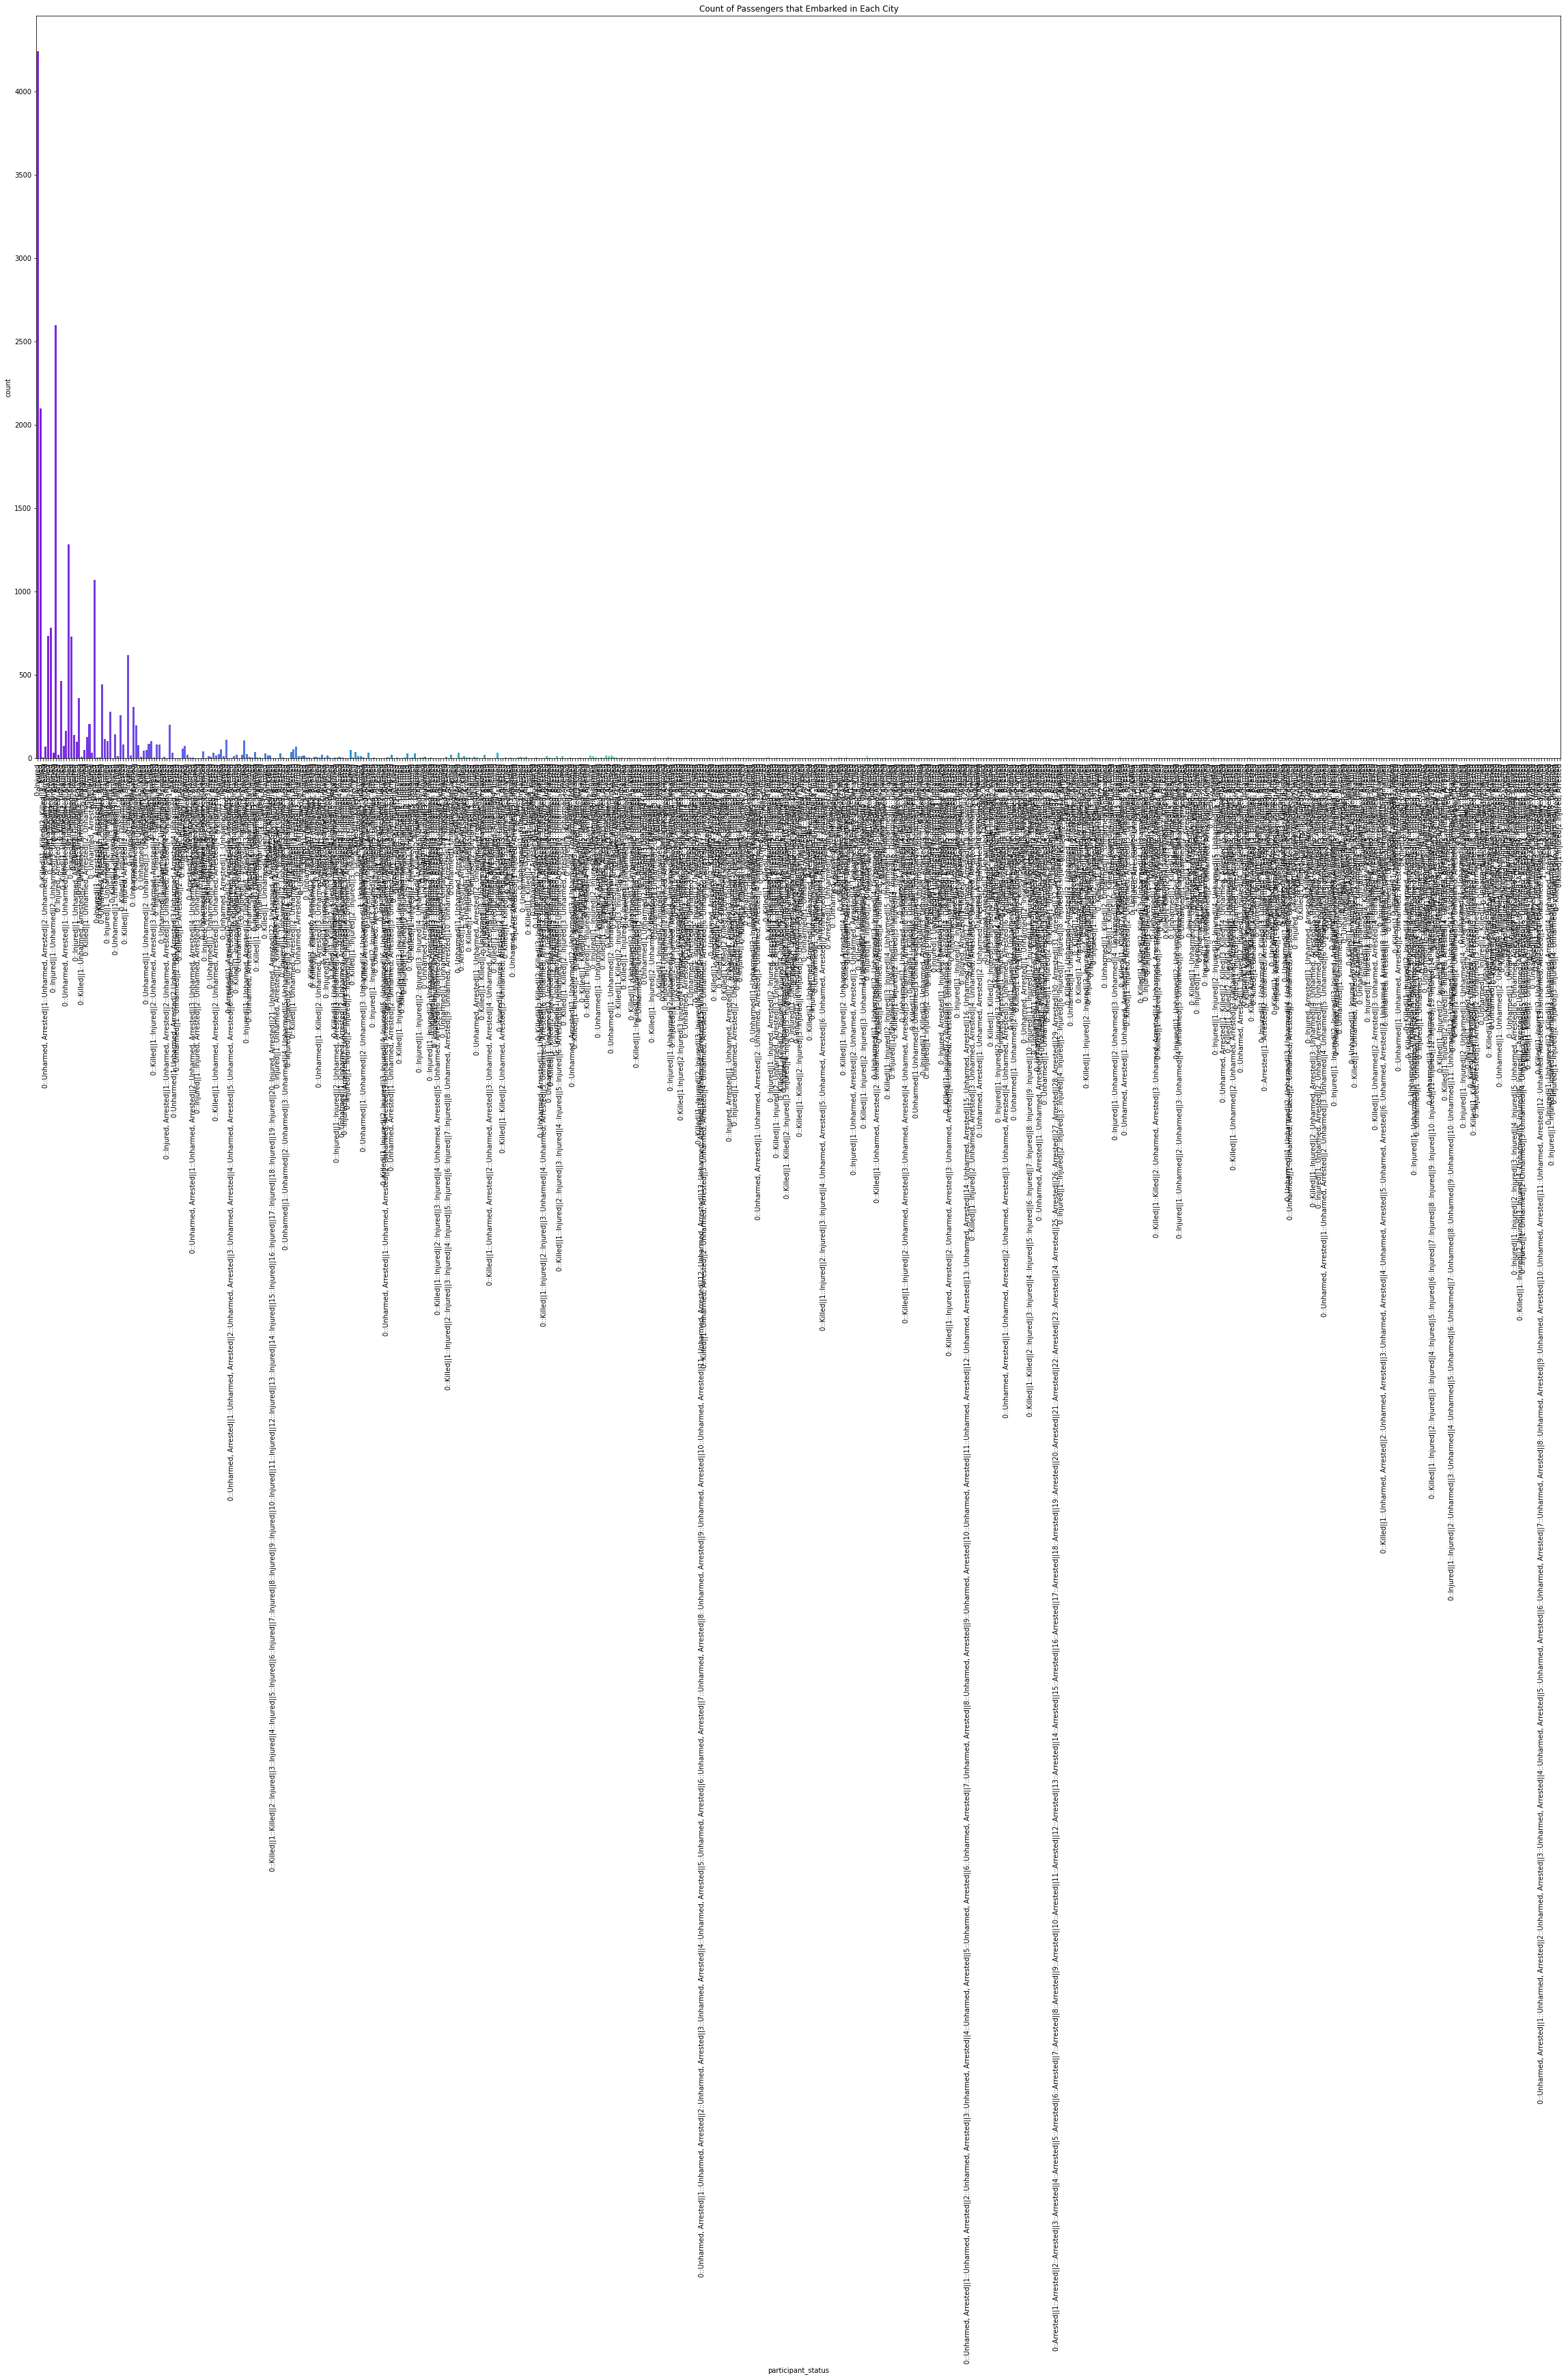

In [41]:
plt.figure(figsize=(40,20))
g = sns.countplot(x='participant_status',data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of Passengers that Embarked in Each City")

We can conclude that this feature isn't uniformly distributed 

###Gun type

In [42]:
df['gun_type'].value_counts()

0::Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                     9248
0::Handgun                                                                                                                                                                                                                                                                                                                                                                                                                                                     1331
0::9mm                                                                                          

In [43]:
plt.figure(figsize=(40,20))
g = sns.countplot(x='gun_type',data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count of Passengers that Embarked in Each City")

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

This feature is also isn't uniformly distributed, although without few features it is uniformly distributed. We also can notice that more then 8000 are Unknow.

###2.(a)

In [44]:
df.isnull().values.any()

True

In [45]:
df.isnull().sum()

Unnamed: 0                      0
incident_id                     0
date                            0
state                           0
city_or_county                  0
address                      1640
n_killed                        0
n_injured                       0
congressional_district       1187
gun_stolen                   9952
gun_type                     9950
incident_characteristics       29
latitude                      629
location_description        19817
longitude                     775
n_guns_involved              9950
notes                        7967
participant_age              9203
participant_age_group        4185
participant_gender           3599
participant_name            12332
participant_relationship    22365
participant_status           2784
participant_type             2523
state_house_district         3953
state_senate_district        3285
dtype: int64

We can see which feature have missing value.

In [46]:
df.isnull().sum().sum()

126125

In [47]:
df.columns[df.isna().any()].tolist()

['address',
 'congressional_district',
 'gun_stolen',
 'gun_type',
 'incident_characteristics',
 'latitude',
 'location_description',
 'longitude',
 'n_guns_involved',
 'notes',
 'participant_age',
 'participant_age_group',
 'participant_gender',
 'participant_name',
 'participant_relationship',
 'participant_status',
 'participant_type',
 'state_house_district',
 'state_senate_district']

In [48]:
lst_null = df.columns[df.isna().any()].tolist()

In [49]:
for col in lst_null:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [50]:
df.isnull().sum().sum()

0

We can see that there's no more null values.    

###2.(b)

1. Number killed
2. Number injured
3. State
4. Longitude

###Number killed

In [51]:
df['n_killed'].unique()

array([ 0, -1,  4,  1,  2, -2,  3, -3,  5, -4, -5])

We can notice it is impossible that this number to be negative, and I will assume that the minus is a mistake, so I will take the absolute value.



In [52]:
def fix_n_kiled():
  df['n_killed'] = df['n_killed'].apply(lambda x: abs(x))

In [53]:
fix_n_kiled()

In [54]:
df['n_killed'].unique()

array([0, 1, 4, 2, 3, 5])

###Number injured

In [26]:
df['n_injured'].unique()

array([  1,   0,  -1,  -3,  -2,   2,   3, -19,  -5,   5,   4,  -6,  -4,
         7,   6,   9,  -7,  14, -10,  -8, -15])

Same as before, We can notice it is impossible that this number to be negative, and I will assume that the minus is a mistake, so I will take the absolute value.


In [55]:
def fix_n_injured():
  df['n_injured'] = df['n_injured'].apply(lambda x: abs(x))

In [56]:
fix_n_injured()

In [57]:
df['n_injured'].unique()

array([ 1,  0,  3,  2, 19,  5,  4,  6,  7,  9, 14, 10,  8, 15])

###State

In [15]:
df['state'].unique()

array(['Utah', '-1', 'south carolina', 'Michigan', 'Georgia', 'Maryland',
       'Florida', 'Alabama', 'Connecticut', 'Illinois', 'Oregon',
       'New York', 'Missouri', 'Texas', 'West Virginia',
       'District of Columbia', 'Louisiana', 'South Carolina', 'Tennessee',
       'California', 'Delaware', 'New Jersey', 'Massachusetts',
       'Kentucky', 'Rhode Island', 'Washington', 'Alaska',
       'North Carolina', 'Nebraska', 'Pennsylvania', 'Oklahoma', 'Kansas',
       'illinois', 'Minnesota', 'Wisconsin', 'Indiana', 'michigan',
       'Mississippi', 'alabama', 'Virginia', 'Ohio', 'new york',
       'Arkansas', 'South Dakota', 'florida', 'missouri', 'New Hampshire',
       'massachusetts', 'ohio', 'louisiana', 'Montana', 'Arizona', 'utah',
       'new jersey', 'texas', 'Hawaii', 'Colorado', 'North Dakota',
       'washington', 'new mexico', 'Iowa', 'nevada', 'Nevada',
       'west virginia', 'district of columbia', 'tennessee', 'Idaho',
       'iowa', 'Maine', 'north carolina', 'ken

As before we can noticed that there are atates with the value -1, which is illogical, morever we have few states that are the same but apears twice: as texas and Texas.

In [66]:
def fix_state():
  df['state'] = df['state'].apply(lambda x: "Unknown" if x == "-1" else x)
  df['state'] = df['state'].apply(lambda x: x.capitalize())

In [67]:
fix_state()

In [68]:
df['state'].unique()

array(['Utah', 'Unknown', 'South carolina', 'Michigan', 'Georgia',
       'Maryland', 'Florida', 'Alabama', 'Connecticut', 'Illinois',
       'Oregon', 'New york', 'Missouri', 'Texas', 'West virginia',
       'District of columbia', 'Louisiana', 'Tennessee', 'California',
       'Delaware', 'New jersey', 'Massachusetts', 'Kentucky',
       'Rhode island', 'Washington', 'Alaska', 'North carolina',
       'Nebraska', 'Pennsylvania', 'Oklahoma', 'Kansas', 'Minnesota',
       'Wisconsin', 'Indiana', 'Mississippi', 'Virginia', 'Ohio',
       'Arkansas', 'South dakota', 'New hampshire', 'Montana', 'Arizona',
       'Hawaii', 'Colorado', 'North dakota', 'New mexico', 'Iowa',
       'Nevada', 'Idaho', 'Maine', 'Wyoming', 'Vermont'], dtype=object)

In [ ]:
def fix_state():
  df['state'] = df['state'].apply(lambda x: "Unknown" if x == "-1" else x)

###Longitude

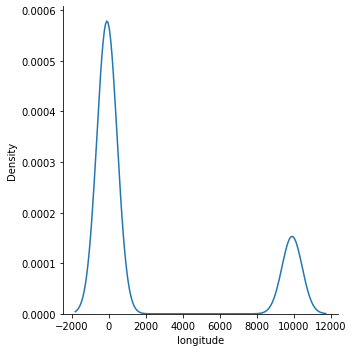

In [14]:
sns.displot(df, x="longitude", kind="kde")

We can notice that the llegl range of longitude is between -180 to 80, So I replace values are not in the range to mode.

In [70]:
def fix_longitude():
    df["longitude"] = df["longitude"].apply(lambda x : x if -180 <= float(x) <= 80 else df["longitude"].mode()[0])

In [71]:
fix_longitude()

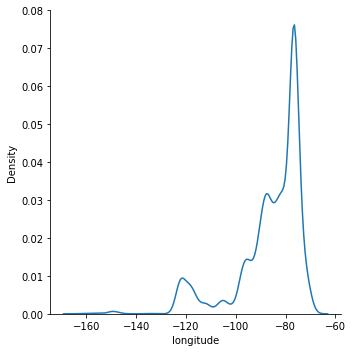

In [72]:
sns.displot(df, x="longitude", kind="kde")

###3.(a)

In [76]:
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

Text(0.5, 1.0, 'Crimes per Year')

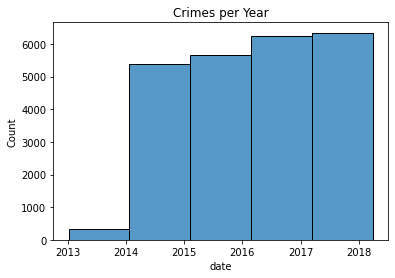

In [158]:
d = df.year.max() - df.year.min()
sns.histplot(data=df,x='date', bins=d)
plt.title("Crimes per Year")

We can see that the crimes increase over the years.

I create new feature contains the number of kiiled and injured together.

In [160]:
df['n_killed_and_injured'] = df['n_killed'] + df['n_injured']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:385: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



Text(0.5, 1.0, 'Killed and Injured per Year')

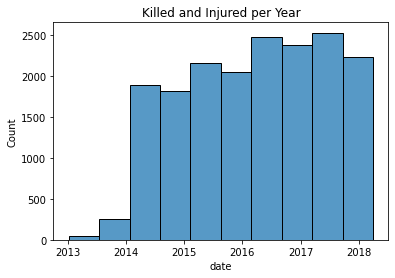

In [175]:
sns.histplot(data=df,x='date', weights='n_killed_and_injured')
plt.title("Killed and Injured per Year")

Also here we can see increase of the killed and injuried people over the years, on 2018 we can see a slight drop

I create a feature based on incident_characteristics of incident were had a shot and it wasn't by accident 

In [176]:
df["shoot_crime"] = df["incident_characteristics"].apply(lambda x: 1 if "Shot" in x and "Accidental Shooting" not in x else 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:385: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



Text(0.5, 1.0, 'Crimes per Year')

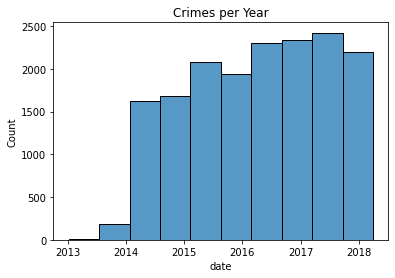

In [172]:
sns.histplot(data=df,x='date', weights='shoot_crime')
plt.title("Shooting Incident per Year")

We can see a similar trend here as well

I create a new feature based on participant_status - killed.

In [177]:
df["sever_killed"] = df["participant_status"].apply(lambda x: x.count("Killed"))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:385: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



Text(0.5, 1.0, 'Killed per Year')

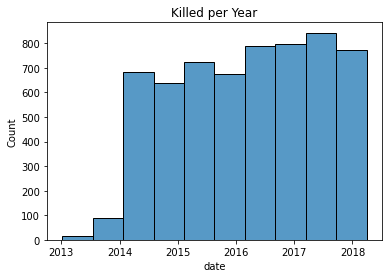

In [178]:
sns.histplot(data=df,x='date', weights='sever_killed')
plt.title("Killed per Year")

I create a new feature based on participant_status - Injured.

In [179]:
df["sever_Injured"] = df["participant_status"].apply(lambda x: x.count("Injured"))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:385: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



Text(0.5, 1.0, 'Injures per Year')

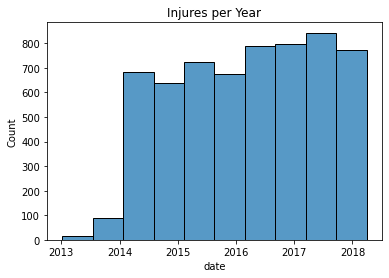

In [180]:
sns.histplot(data=df,x='date', weights='sever_killed')
plt.title("Injures per Year")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:385: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



Text(0.5, 1.0, 'Injures per Year')

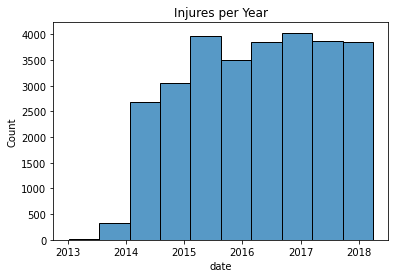

In [181]:
sns.histplot(data=df,x='date', weights='n_guns_involved')
plt.title("Injures per Year")

To conclude, there is a moderate upward trend, of the amount of guns are involved, But from 2015 to 2018 is almot uniform distribution.
Also we can notice that the crimes got more sever as the number of death and injures are increase over the years, and also the number of shooting are increase.

I chose to look on the number of shooting as criteria for sever, and number of killed and injures.

###3.(b)

I chose to look on state and city or country feature as were can indicate well the locations of crimes

                shoot_crime
city_or_county             
Chicago                1144
Baltimore               420
Washington              336
Philadelphia            320
New Orleans             289
Jacksonville            260
Houston                 251
Milwaukee               232
Memphis                 230
Columbus                225
Saint Louis             215
Cleveland               210
Indianapolis            190
Detroit                 183
Springfield             175


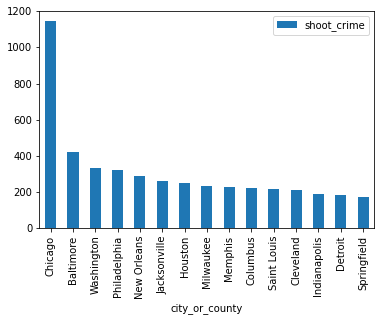

In [134]:
ctwise_total = df[["shoot_crime"]].groupby(df["city_or_county"]).count()
top_ct = ctwise_total.sort_values(by='shoot_crime', ascending=False).head(15)
print(top_ct)
top_ct.plot.bar()
del(top_ct)

As there are so many values on this feature I plot only the biggets 15 locations, and we can see that Chicago is the location with the most crimes were are invloved shooting - more then 1000.

                shoot_crime
state                      
Illinois               1191
California             1098
Florida                 983
Texas                   917
Ohio                    685
New york                664
Pennsylvania            607
Georgia                 600
North carolina          578
Tennessee               528
Louisiana               519
South carolina          448
Michigan                424
Missouri                416


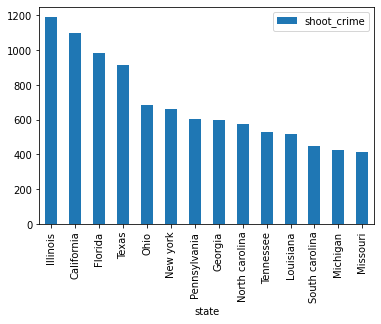

In [135]:
stwise_total = df[["shoot_crime"]].groupby(df["state"]).count()
top_st = stwise_total.sort_values(by='shoot_crime', ascending=False)[1:15]
print(top_st)
top_st.plot.bar()
del(top_st)

On state feature we can notice that illoinois  has the biggest crimes with shooting - more then 1100

                n_killed  n_injured
state                              
California           396        487
Texas                353        384
Florida              251        469
Illinois             229        968
Ohio                 187        396
Pennsylvania         171        358
Georgia              152        260
North carolina       146        312
Louisiana            142        291
Missouri             135        242
Indiana              123        219
Tennessee            120        290
New york             119        319
Alabama              118        169


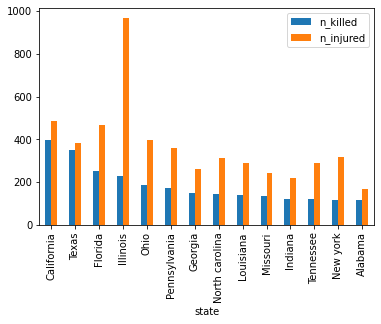

In [168]:
stwise_total = df[['n_killed','n_injured']].groupby(df["state"]).sum()
top_st = stwise_total.sort_values(by=['n_killed','n_injured'], ascending=False)[1:15]
print(top_st)
top_st.plot.bar()
del(top_st)

We can see there's differnce if we looking on the injures, In Illinois for example, is the biggest difference between killed and injures.

                n_killed  n_injured
city_or_county                     
Baltimore            124        248
Houston              124         96
Philadelphia          94        268
New Orleans           85        159
Indianapolis          82        135
Saint Louis           73        162
Kansas City           71         90
Cleveland             60        130
Columbus              59        129
San Antonio           58         96
Memphis               55        156
Detroit               54         93
Los Angeles           54         50
Las Vegas             52         68


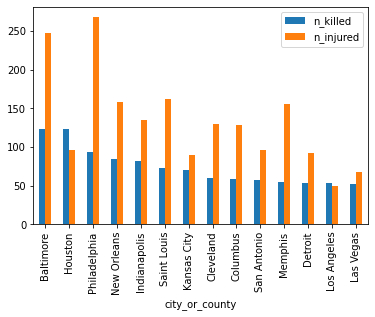

In [138]:
stwise_total = df[['n_killed','n_injured']].groupby(df["city_or_county"]).sum()
top_st = stwise_total.sort_values(by=['n_killed','n_injured'], ascending=False)[1:15]
print(top_st)
top_st.plot.bar()
del(top_st)

Also there are places with much more difference between killed and injures.

I chose these features as it easy to understand it without maps, The disadvantage of this method is that each city is very large and probably there is places with more crimes in the city, and we cant know it with these feature.

###4.(a)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                23967 non-null  int64         
 1   incident_id               23967 non-null  int64         
 2   date                      23967 non-null  datetime64[ns]
 3   state                     23967 non-null  object        
 4   city_or_county            23967 non-null  object        
 5   address                   23967 non-null  object        
 6   n_killed                  23967 non-null  int64         
 7   n_injured                 23967 non-null  int64         
 8   congressional_district    23967 non-null  float64       
 9   gun_stolen                23967 non-null  object        
 10  gun_type                  23967 non-null  object        
 11  incident_characteristics  23967 non-null  object        
 12  latitude          

This features are not the best to make One Hot Encoding, we can see that we have 670 columns which is quite a lot for two features.

In [142]:
pd.get_dummies(df, columns=['state', 'participant_status'])

Unnamed: 0  incident_id       date    city_or_county  \
0               0       137007 2016-07-23            Draper   
1               1        49807 2014-12-13           Chicago   
2               2         2318 2014-01-15              Irmo   
3               3       237635 2018-03-18           Detroit   
4               4       238068 2018-03-21     Benton Harbor   
...           ...          ...        ...               ...   
23962       23962        45255 2014-11-06       Fond Du Lac   
23963       23963       157269 2016-11-19            Ruskin   
23964       23964       197544 2017-07-10           Detroit   
23965       23965       213943 2017-10-17       Victorville   
23966       23966       191316 2017-06-05  Saint Petersburg   

                                 address  n_killed  n_injured  \
0                            12300 South         0          1   
1      10400 block of South State Street         1          0   
2                    1 Forest Walk Court         4          0   
3         5600 BLOCK OF JOHN C LODGE FWY         0          0   
4               1200 block of Parkway Dr         0          0   
...                                  ...       ...        ...   
23962                     329 S. Main St         0          0   
23963           1900 block of Pier Drive         0          0   
23964           12000 block of Whitehill         0          1   
23965                Starshine and Pluto         0          0   
23966                    4519 15th Ave S         0          1   

       congressional_district  gun_stolen    gun_type  ...  \
0                         4.0  0::Unknown  0::Unknown  ...   
1                         2.0  0::Unknown  0::Unknown  ...   
2                         2.0  0::Unknown  0::Unknown  ...   
3                         1.0  0::Unknown  0::Unknown  ...   
4                         6.0   0::Stolen  0::Handgun  ...   
...                       ...         ...         ...  ...   
23962                     6.0  0::Unknown  0::Unknown  ...   
23963                    14.0  0::Unknown  0::Unknown  ...   
23964                    14.0  0::Unknown  0::Unknown  ...   
23965                     8.0  0::Unknown  0::Unknown  ...   
23966                    14.0  0::Unknown  0::Unknown  ...   

      participant_status_1::Unharmed||2::Unharmed  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
23962                                           0   
23963                                           0   
23964                                           0   
23965                                           0   
23966                                           0   

      participant_status_1::Unharmed||2::Unharmed, Arrested||3::Unharmed, Arrested  \
0                                                      0                             
1                                                      0                             
2                                                      0                             
3                                                      0                             
4                                                      0                             
...                                                  ...                             
23962                                                  0                             
23963                                                  0                             
23964                                                  0                             
23965                                                  0                             
23966                                                  0                             

      participant_status_1::Unharmed||2::Unharmed||3::

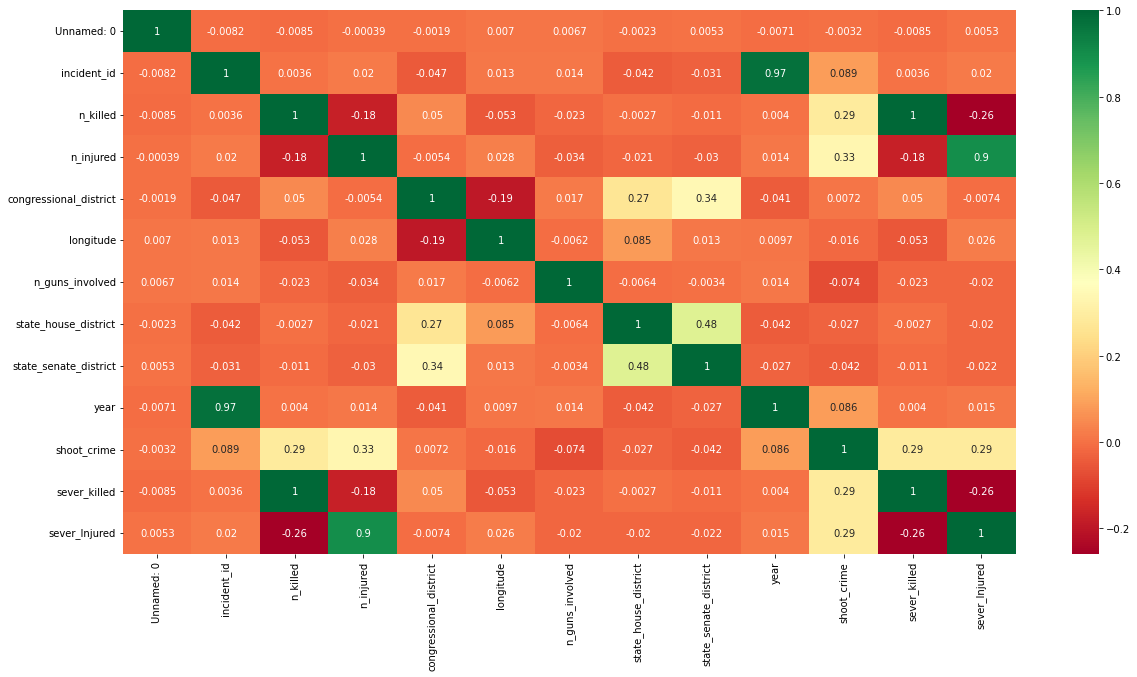

In [144]:
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',ax=ax)

We can see a positive correlation between state_house_district and state_senate_distric = 0.48.


We can see a positive correlation between congressional_district and state_senate_disticit = 0.34.

4.(b)

In [145]:
df["new_n_injured"] = df["participant_status"].apply(lambda x: x.count("Injured"))

Text(0.5, 1.0, 'Count Injured')

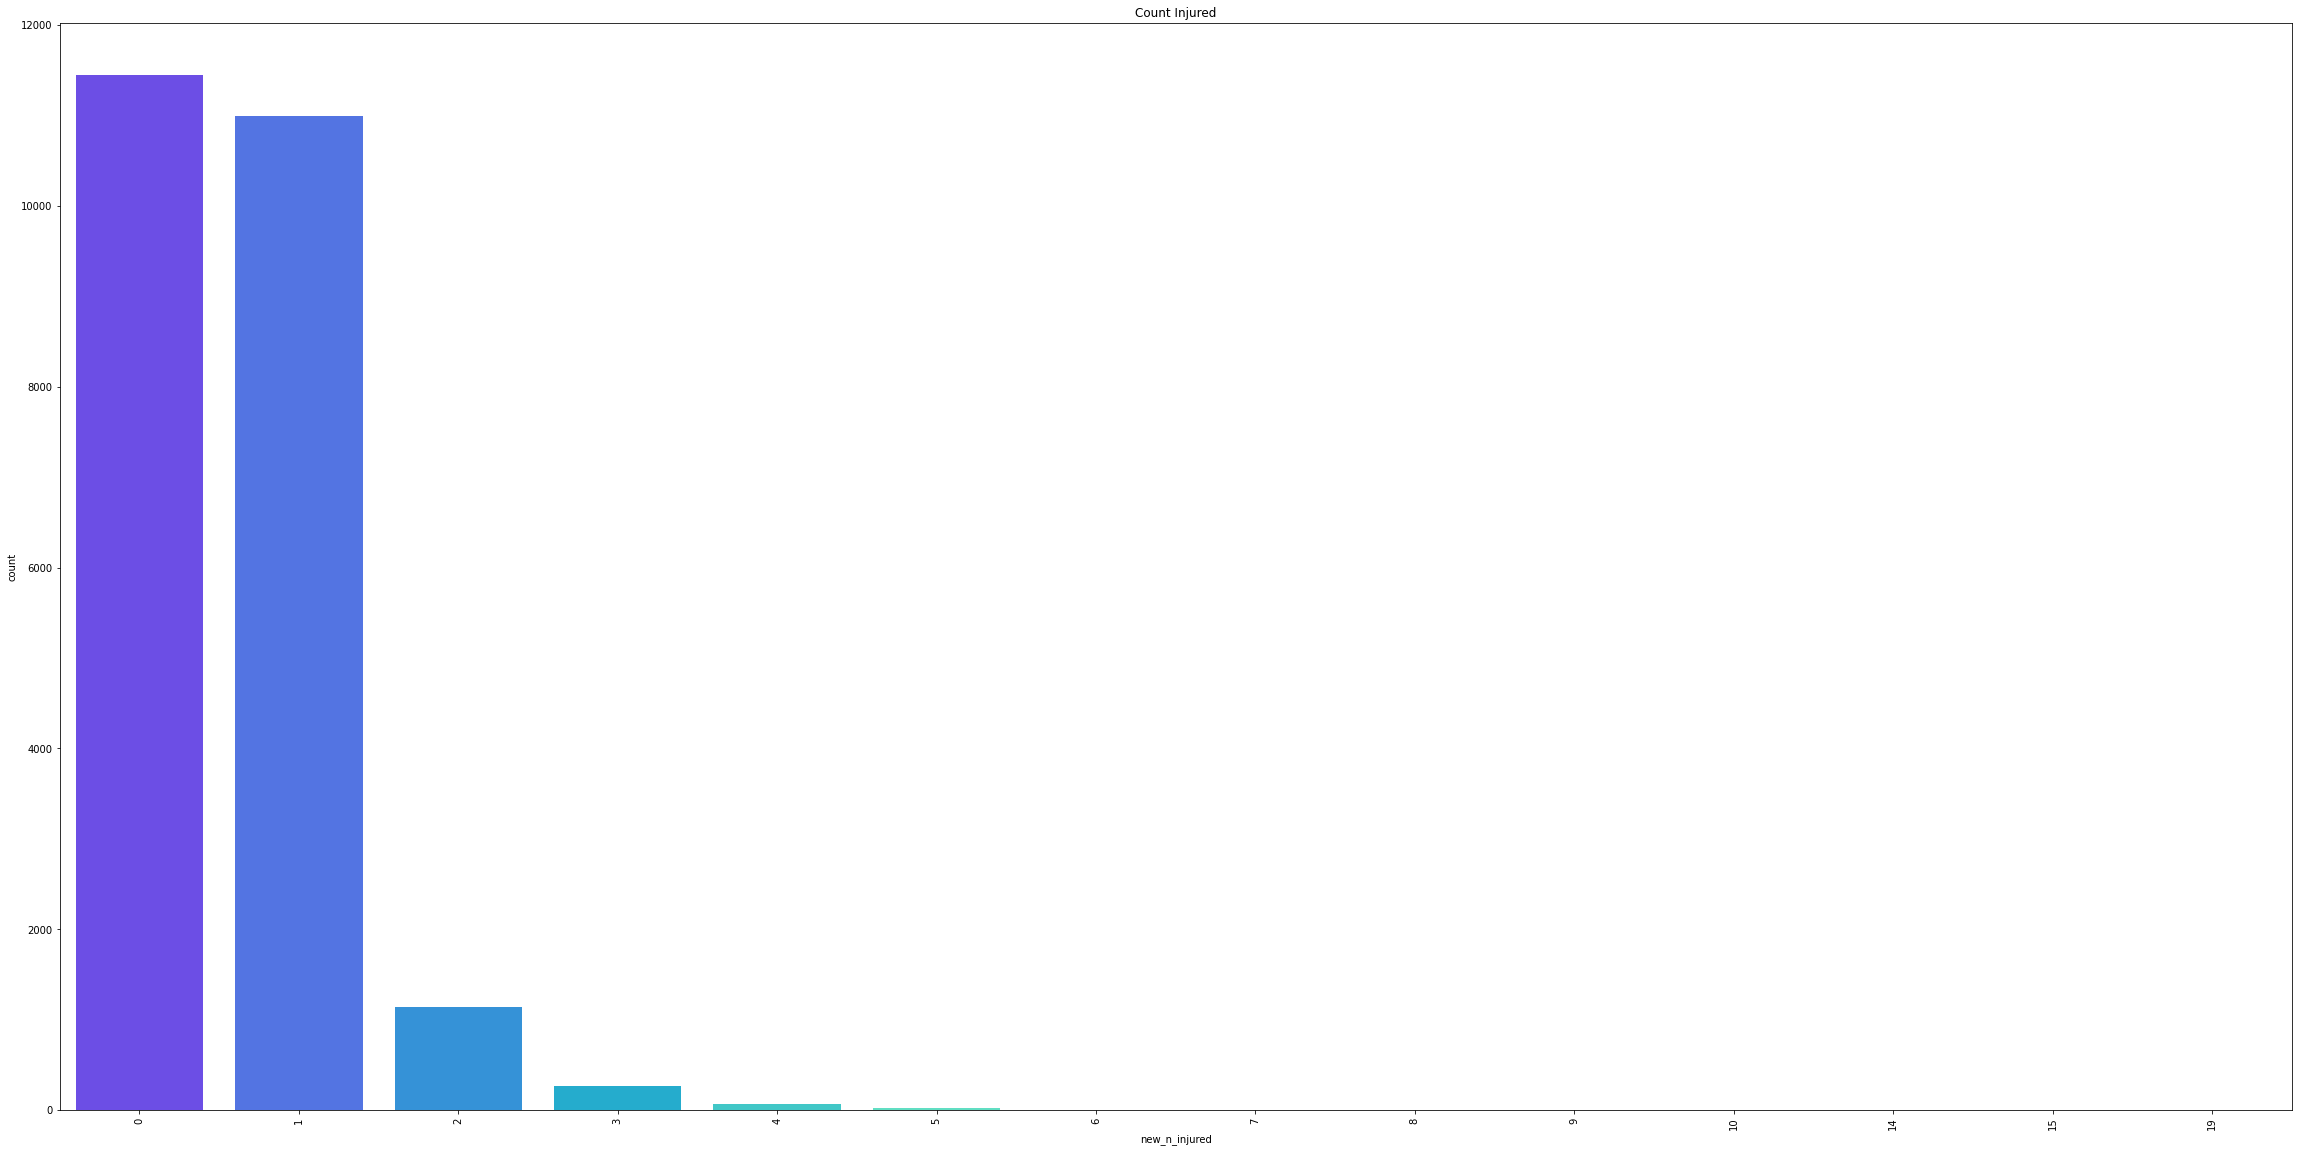

In [182]:
plt.figure(figsize=(40,20))
g = sns.countplot(x='new_n_injured',data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Count Injured")

I count the number of times showed injured on participant_status feature, as in that feature theres a counting of killed, injured ect. 